In [52]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

## Testing Metrics

In [29]:
mlp = pd.read_csv("../MLP_testing_metrics.csv")
mlp["model"] = "MLP"

smlp = pd.read_csv("../SiameseMLP_testing_metrics.csv")
smlp["model"] = "SiameseMLP"

cnn = pd.read_csv("../ConvNet_testing_metrics.csv")
cnn["model"] = "ConvNet"

scnn = pd.read_csv("../SiameseConvNet_testing_metrics.csv")
scnn["model"] = "SiameseConvNet"

In [30]:
test = pd.concat([mlp, smlp, cnn, scnn])

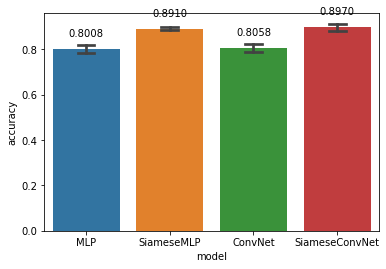

In [48]:
fig, ax = plt.subplots()

p = sns.barplot(data=test, y="accuracy", x="model", ci="sd", capsize=.2)

for bar in p.patches:
    p.annotate(format(bar.get_height(), '.4f'), 
                (bar.get_x() + bar.get_width() / 2., bar.get_height() + .03),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')

In [62]:
metrics = test[['accuracy', 'precision', 'recall', 'model']]

table = metrics.groupby(by='model', as_index=True).agg(
    {'accuracy': ['mean', 'std'], 'precision': ['mean', 'std'], 'recall': ['mean', 'std']}
)

table = table * 100

print(table.to_latex(float_format="%.2f"))

## Training Metrics

In [72]:
mlp = pd.read_csv("../MLP_training_metrics.csv")
mlp["model"] = "MLP"

smlp = pd.read_csv("../SiameseMLP_training_metrics.csv")
smlp["model"] = "SiameseMLP"

cnn = pd.read_csv("../ConvNet_training_metrics.csv")
cnn["model"] = "ConvNet"

scnn = pd.read_csv("../SiameseConvNet_training_metrics.csv")
scnn["model"] = "SiameseConvNet"

In [73]:
train = pd.concat([mlp, smlp, cnn, scnn])

In [107]:
SMALL_SIZE = 10
MEDIUM_SIZE = 12
LARGE_SIZE = 16

mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.size'] = SMALL_SIZE
mpl.rcParams['axes.titlesize'] = SMALL_SIZE
mpl.rcParams['axes.labelsize'] = MEDIUM_SIZE
mpl.rcParams['xtick.labelsize'] = SMALL_SIZE
mpl.rcParams['ytick.labelsize'] = SMALL_SIZE
mpl.rcParams['legend.fontsize'] = SMALL_SIZE
mpl.rcParams['figure.titlesize'] = LARGE_SIZE

mpl.rcParams['axes.grid'] = True
mpl.rcParams['axes.facecolor'] = '#F5F5F5'
mpl.rcParams['axes.axisbelow'] = True
mpl.rcParams['grid.linestyle'] = ':'

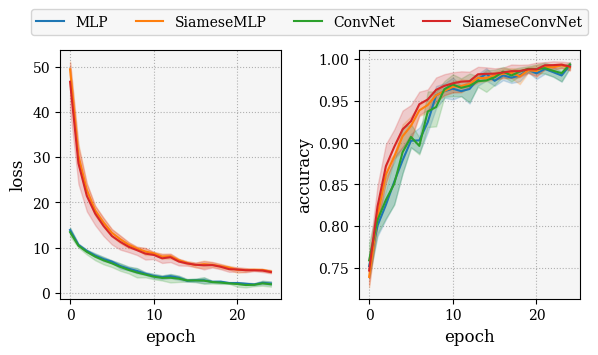

In [113]:
fig, axes = plt.subplots(1, 2, figsize=(6, 3.25), dpi=100)

g = sns.lineplot(data=train, x='epoch', y='loss', hue='model', ax=axes[0], legend='brief')
sns.lineplot(data=train, x='epoch', y='accuracy', hue='model', ax=axes[1], legend=False)

h,l = g.axes.get_legend_handles_labels()
g.axes.legend_.remove()
lgd = fig.legend(h,l, ncol=4, bbox_to_anchor=(1.0, 1.10))

plt.tight_layout()
fig.savefig('../figures/training.png', bbox_extra_artists=(lgd,), bbox_inches='tight', dpi=fig.dpi)
plt.show()

In [78]:
metrics = train[train.epoch == 24][['accuracy', 'model']]

table = metrics.groupby(by='model', as_index=True).agg(
    {'accuracy': ['mean', 'std']}
)

table = table * 100

print(table.to_latex(float_format="%.2f"))

\begin{tabular}{lrr}
\toprule
{} & \multicolumn{2}{l}{accuracy} \\
{} &     mean &  std \\
model          &          &      \\
\midrule
ConvNet        &    99.38 & 0.41 \\
MLP            &    99.30 & 0.44 \\
SiameseConvNet &    99.12 & 0.61 \\
SiameseMLP     &    99.02 & 0.48 \\
\bottomrule
\end{tabular}

